# Instacart Dataset – Exploratory Data Analysis (EDA)

## Objectif
Ce notebook a pour objectif de comprendre la structure, le contenu et la qualité
du dataset Instacart afin de préparer les étapes suivantes :
- Analyse comportementale client
- Association de produits
- Simulation de gains / économies pour les retailers


## Chargement des données

Le dataset Instacart contient 6 fichiers principaux :

* `orders.csv`
* `order_products__prior.csv`
* `order_products__train.csv`
* `products.csv`
* `aisles.csv`
* `departments.csv`

In [35]:
import pandas as pd
import numpy as np

path = "C:\\Users\\i025423\\OneDrive - Alliance\\Documents\\DSTI\\instacart-retail-project\\data_raw\\"  # adapte si besoin

orders = pd.read_csv(path + "orders.csv")
order_products_prior = pd.read_csv(path + "order_products__prior.csv")
order_products_train = pd.read_csv(path + "order_products__train.csv")
products = pd.read_csv(path + "products.csv")
aisles = pd.read_csv(path + "aisles.csv")
departments = pd.read_csv(path + "departments.csv")


In [ ]:
from IPython.display import display

def overview(df, name):
    print(f"\n--- {name} ---")
    display(df.head())
    print("Shape:", df.shape)
    print("Missing values:")
    display(df.isna().sum())
    print("Data types:")
    display(df.dtypes)
    print("Descriptive statistics:")
    display(df.describe(include='all'))

overview(orders, "orders")

overview(order_products_prior, "order_products__prior")
overview(products, "products")
overview(aisles, "aisles")
overview(departments, "departments")



--- orders ---


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Shape: (3421083, 7)
Missing values:


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Data types:


order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

Descriptive statistics:


## 5️⃣ Exploration détaillée des tables (orders)

🟦 `orders.csv`

Colonnes clés :

* order_id: Represents the order ID
* user_id: Represents the user ID
* eval_set: Takes three values (prior, train, test)
* order_number: Represent the order number
* order_dow (day of week): the day of the order
* order_hour_of_day: the hour of the order
* days_since_prior_order: days passed since the last order (column with more missing values)



In [ ]:
# Additional exploration for orders: Columns types
orders.info()
# Additional exploration for orders: Descriptive statistics
orders.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3421083,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,3214874,NaN,NaN,NaN,NaN
mean,1.710542e+06,1.029782e+05,NaN,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,NaN,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,NaN,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01


In [ ]:
orders["order_dow"].value_counts().sort_index()

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: count, dtype: int64

👉 Questions to ask :

- Do clients command more on certain days?
- In which hour ?
- What frequency ?

C:\Users\i025423\AppData\Local\Temp\ipykernel_38100\2161308945.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders.groupby("order_dow_name")["order_id"].nunique().plot(kind="bar", title="Number of unique orders by day of the week")


<Axes: title={'center': 'Number of unique orders by day of the week'}, xlabel='order_dow_name'>

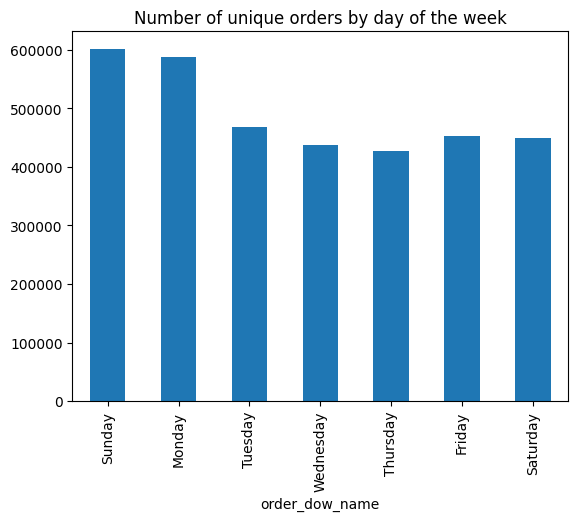

In [ ]:
# Do clients command more on certain days?
# Visualize the number of unique orders by day of the week
import matplotlib.pyplot as plt
# print the name of days for order_dow
day_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
orders["order_dow_name"] = orders["order_dow"].map(day_names)
# Sort by day of the week
orders["order_dow_name"] = pd.Categorical(orders["order_dow_name"], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
# Plot   
orders.groupby("order_dow_name")["order_id"].nunique().plot(kind="bar", title="Number of unique orders by day of the week")

<Axes: title={'center': 'Number of unique orders by hour of the day'}, xlabel='Hour of the day', ylabel='Number of unique orders'>

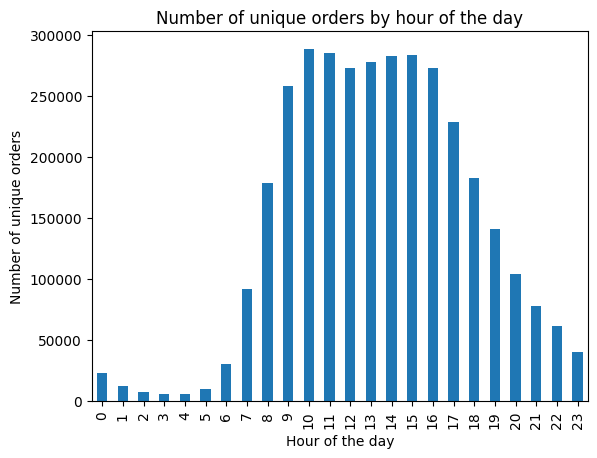

In [ ]:
# In which hour ?
orders["order_hour_of_day"].value_counts().sort_index().plot(kind="bar", title="Number of unique orders by hour of the day", xlabel="Hour of the day", ylabel="Number of unique orders")

<Axes: title={'center': 'Distribution of number of orders per user'}, xlabel='Number of orders', ylabel='Number of users'>

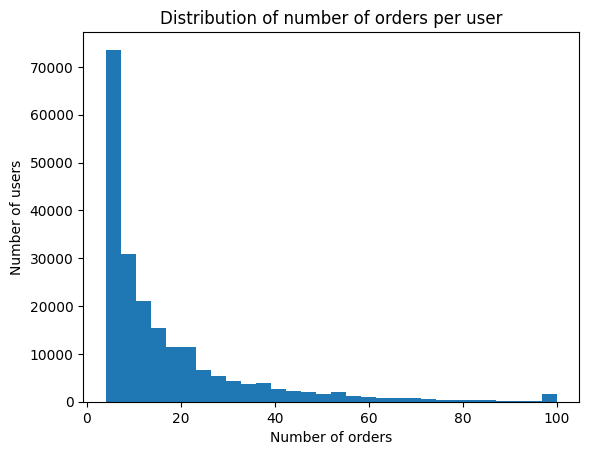

In [ ]:
# Which frequency of orders per user ?
orders_per_user = orders.groupby("user_id")["order_id"].nunique()
orders_per_user.plot(kind="hist", bins=30, title="Distribution of number of orders per user", xlabel="Number of orders", ylabel="Number of users")

## Exploring 🟦 `products.csv` and `order_products_prior`


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
products = products.merge(aisles, on="aisle_id") \
        .merge(departments, on="department_id") \
        .head()


In [ ]:
# Merge products with order_products_prior to explore the products bought
order_products_prior = order_products_prior.merge(products, on="product_id")
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1107,1,7,0,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2998,3,6,1,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
2,5319,1,3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
3,7540,1,4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
4,9228,1,2,0,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks


<Axes: title={'center': 'Top 10 most ordered aisles'}, xlabel='Aisle', ylabel='Number of orders'>

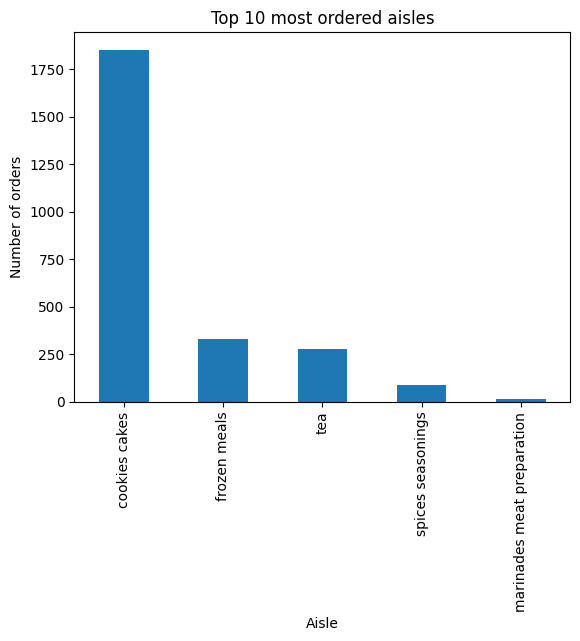

In [ ]:
# Top 10 most ordered products
top_10_products = order_products_prior["product_name"].value_counts().head(10)
top_10_products.plot(kind="bar", title="Top 10 most ordered products", xlabel="Product name", ylabel="Number of orders")
# Top 10 most ordered aisles
top_10_aisles = order_products_prior["aisle"].value_counts().head(10)
top_10_aisles.plot(kind="bar", title="Top 10 most ordered aisles", xlabel="Aisle", ylabel="Number of orders")
# Top 10 most ordered departments
top_10_departments = order_products_prior["department"].value_counts().head(10)
top_10_departments.plot(kind="bar", title="Top 10 most ordered departments", xlabel="Department", ylabel="Number of orders")

<Axes: title={'center': 'Proportion of reordered products'}, ylabel='proportion'>

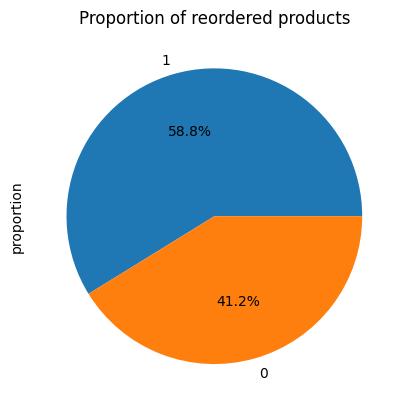

In [ ]:
order_products_prior["reordered"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', title='Proportion of reordered products')

Une grande partie des achats sont des ré-achats, ce qui est crucial pour :

- la prédiction
- la fidélisation
- les bundles intelligents

In [ ]:
basket_size = order_products_prior.groupby("order_id")["product_id"].count()
basket_size

order_id
1107       1
2998       1
5319       1
7540       1
9228       1
          ..
3416680    1
3416714    1
3417477    1
3418993    1
3419644    1
Name: product_id, Length: 2563, dtype: int64

## Conclusion de l’exploration

- Le dataset est riche, structuré et adapté à l’analyse comportementale.
- La forte proportion de ré-achats ouvre la voie à des stratégies de fidélisation.
- La structure transactionnelle permet l’application d’algorithmes
  d’association (Apriori, FP-Growth, UP-Tree).
- Les prochaines étapes consisteront à :
  - Construire des paniers clients
  - Appliquer des règles d’association
  - Simuler des gains financiers pour les retailers
